<a href="https://colab.research.google.com/github/AlexandraJMV/ADA-Informes/blob/main/Informe_Algoritmo_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmo: Selection

## 1. **Problema: *Problema de la selección.***

***Entrada:*** Conjunto de $A$ de $n$ números diferentes más un índice $i$, con $1 \le i \le n $

***Salida:*** Elemento $x \in A $, que es mayor a exactamente $i-1$ elementos de $A$.


El estadístico de orden $i$ es el $i-ésimo$ elemento más pequeño de la muestra. 

## 2. ***Selection***
Con tal de resolver este problema uno podría simplemente ordenar el arreglo $A$ y retornar el valor en la $i-ésima$ posición. Sin embargo existe un algorimo más rápido, presentando una diferencia de $O(n\cdot log(n))$ para ordenar vs un $O(n)$ para obtener solamente el estadístico de orden $i$.

Este algoritmo es nuevamente del tipo *Divide y Vencerás* y está modelado a partir del algoritmo previamente visto `QuickSort`.



### 2.1 **Código**

In [ ]:
def insertionSort(arr):
 
    for i in range(1, len(arr)):
        key = arr[i]
        j = i-1
        while j >=0 and key < arr[j] :
                arr[j+1] = arr[j]
                j -= 1
        arr[j+1] = key
    return arr

In [ ]:
def exchange(A,i, j):
    aux = A[i]
    A[i] = A[j]
    A[j] = aux

    return

In [ ]:
# Asume que el pivote es el ultimo elemento
def partition(A, p, r):
    pivot = A[r]
    
    i = p-1
    j = p
    c = 0

    for j in range(j,r):
        c += 1    
        if A[j] <= pivot:
            i += 1
            exchange(A, i, j)

    exchange(A, i+1, r)
    return i+1, c

In [ ]:
def pivot_selection(A, p, r, verbose = False):
    if p == r : 
        if verbose == True:
            print(f"\n    Mediana encontrada! {A[p]}!!\n")
        return A[p]                     # Caso base de la recursion

    m = []                                      # Arreglo de medianas

    if verbose == True:
        print(f"\n        A = [", end="")

    for i in range(p,r+1, 5):
        if i+4 <= r:
            if verbose == True:
                print(f"{A[i:i+5]}", end="")
            A[i:i+5] = insertionSort(A[i:i+5])  # Ordenar elementos
            m.append(A[i+2])                    # Agregar mediana
        else:
            if verbose == True:
                print(f"{A[i:r+1]}", end="")
            A[i:r+1] = insertionSort(A[i:r+1])
            a = i + (r-i)//2
            m.append(A[a])
            
    if verbose == True: 
        print("]")
        print(f"        Lista de medianas: {m}")
    return pivot_selection(m, 0, len(m)-1, verbose = verbose)

In [ ]:
def select(A, p, r, i, verbose = False, c = 0, pasada = 1):
    if verbose == True and c == 0:
        print(f"Arreglo de entrada: {A[p:r+1]}")
        print(f"Buscando estadistico de orden {i}")
        print(f"----------------------------------------------------------")
    

    if p == r:                  # Caso base de la recursion
        if verbose == True:
            print(f"----------------------------------------------------------")
            print(f"El estadistico de orden k es igual a {A[p]}") 
            print(f"La cantidad de comparaciones en total es de {c}")

        return A[p], c           
    
    if verbose == True:
        print(f"Pasada numero {pasada}\n")
        print(f"Arreglo pre-particion: {A[p:r+1]}\n")
        print(f"Seleccion del pivote:")

    q = pivot_selection(A, p, r, verbose = verbose) # Eleccion del pivote (valor)

    for u in range(p, r+1):      # Busqueda indice del pivote
        if A[u] == q: q = u
    exchange(A,q,r)              # Re ubicacion del pivote 

    q, d = partition(A,p,r)      # Particion (Con ultimo elemento como pivote)
    comp = c + d

    if verbose == True:
        print(f"Arreglo post-particion: {A[p:r+1]}\n")
        print(f"Pivote se encuentra en la posicion {q}\n")
        print(f"Comparaciones en esta pasada : {d}")
        print(f"Suma de comparaciones : {comp}\n")
        


    k = q - p + 1

    if i == k:                         # Pivote corresponde al elemento de orden i
        if verbose == True:
            print(f"----------------------------------------------------------")
            print(f"El estadistico de orden {i} es igual a {A[q]}, el pivote de la pasada {pasada}!") 
            print(f"La cantidad de comparaciones en total es de {comp}")
        return A[q], comp

    elif i < k:                        # Se itera en la parte del arreglo menor al pivote
        if verbose == True:
            print(f"El pivote es el {q+1} elemento.")
            print(f"El estadistico esta ubicado antes del pivote!\n")
            print(f"Arreglo a considerar en siguiente iteracion :\n{A[p:q]}")
            print(f"----------------------------------------------------------")
        
        return select(A, p, q - 1, i, c = comp, verbose = verbose, pasada = pasada + 1)

    else:                               # Se itera en la parte del arreglo mayor al pivote
        if verbose == True:
            print(f"El pivote es el {q+1} elemento.")
            print(f"El estadistico esta ubicado despues del pivote!\n")
            print(f"Arreglo a considerar en siguiente iteracion :\n{A[q+1:r+1]}")
            print(f"----------------------------------------------------------")
        
        return select(A, q+1, r, i-k, c = comp, verbose = verbose, pasada = pasada + 1)

In [ ]:
# Ejemplo
A=[6,9,0,2,1,4,5,3,8,11,12]
i = 7
k, c = select(A, 0, len(A)-1,i)

print(f"Se ha encontrado el estadistico de orden i = {k} con {c} comparaciones")

Se ha encontrado el estadistico de orden i = 6 con 15 comparaciones


### 2.3 **Descripción del algoritmo**

De forma similar a `QuickSort`, `Select` particiona de forma recursiva en el arreglo con tal de encontrar el $i-ésimo$ menor elemento perteneciente a $A$. La principal diferencia es que, en lugar de iterar en todo el arreglo, la versión de `Partition` para `Select` solamente considera aquella fracción que contenga $i$.

Funciona de la siguiente forma:

> El algoritmo recibe como entrada una lista $A$ de $n$ elementos.  Sean $p$ y $r$ sus índices inferior y superior, respectivamente.<br><br>
>
>
> 1. *Se divide el arreglo $A$ en $[n/5]$ sub-conjuntos de $5$ elementos, a excepción del último que puede llegar a tener menos.*
> 2. *Se ordenan estos sub-conjuntos con `InsertionSort` con tal de extraer la mediana de cada uno, almacenando estos valores en un arreglo auxiliar $m$.*
> 3. *Buscar recursivamente la mediana $x$ de las medianas $m$.*
> 4. *Particionar el arreglo utilizando la mediana de medianas $x$, obteniendo su posición $q$.*
> 5. * *Si las posición del pivote coincide con la posición del $i-ésimo$ elemento, se ha encontrado el valor esperado.*
>        * $return$ $A[q]$ 
>    * *Si la posición del pivote es mayor a la del $i-ésimo$ elemento, se llama recursivamente a select para :* 
>
>        * $return$ $select(A, p, q-1, i)$
>    * *Si la posición del pivote es menor a la del $i-ésimo$ elemento, se llama recursivamente a select para :* 
>
>        * $return$ $select(A, q+1, r, i-k)$


En cuanto a la última llamada recursiva, es necesario realizar la operación $i-k$ con tal de considerar la posición relativa de $i$ en $A[q+1,r]$

Por ejemplo, si tenemos un un arreglo:

$a= [7,2,6,8,9,4]$

con $k = 2$ e $i = 4$, se debería buscar el $i-ésimo$ elemento en la mitad de *la derecha*, dado a que la posición del pivote es menor a la de $i$. *(No olvidar que el pivote se encuentra en su posición correcta fuese uno a ordenar el arreglo)*

El nuevo arreglo a analizar es $a=[6, 8, 9, 4]$

Sin embargo, si buscaramos el $i-ésimo$ elemento de este arrego, correspondería al $6to$ del arreglo original, por lo que se busca $i-k = 2$.


### 2.3 **Ejemplo**
Por ejemplo, consideremos el siguiente arreglo $a$ e índice $i$.

$a = [6,9,0,2,1,4,5,3,8,11,12]$

$i = 3$

Como primer paso, se busca un pivote a través de `pivotSelect`.

1. Agrupar elementos en grupos de 5

    $b = [[6, 9, 0, 2, 1], [4, 5, 3, 8, 11], [12]]$

2. Ordenar con `InsertionSort`

    $b = [[0, 1, 2, 6, 9], [3, 4, 5, 8, 11], [12]]$

3. Recolectar las medianas de los grupos

    $m = [2, 5, 12]$

Luego, se llama recursivamente `pivotSelection` sobre las medianas. Al tener este conjunto solamente $3$ elementos, retornará $5$ *(mediana de medianas)*

Por lo tanto, nuestro pivote es $q = 5$. Se mueve el pivote al final del arreglo para proceder con la partición.

$a = [6, 9, 0, 2, 1, 4, 12, 3, 8, 11, 5]$

$a = [0, 2, 1, 4, 3, 5, 12, 6, 8, 11, 9]$

Como el índice resultante del pivote es $q = 5$ y tiene $5$ elementos menores a él, debemos seguir buscando.

Se aplica `Selection` en la mitad inferior del arreglo.


$a_1 = [0, 2, 1, 4, 3]$

$i_1 = 4$

Se busca el pivote. Al tener solamente 5 elementos, se puede visualizar de forma simple que el pivote será la media de $a_1$, es decir, $q = 2$. Se mueve al final para realizar la partición.


$a_1 = [0, 3, 1, 4, 2]$

$a_1= [0, 1, 2, 4, 3]$

Se observa que la posición del pivote $q = 2$ corresponde al $i-ésimo$ elemento, puesto a que tiene $i-1$ elementos menores a él.

`Select` finaliza ejecución, retornando el valor $2$.<br><br>

---




### **2.4 Ejecución paso a paso**` (verbose = True) `

In [ ]:
import random

A = random.sample(range(-30,100), 18)
select(A,0,len(A)-1, verbose=True, i = 6)

Arreglo de entrada: [40, 46, -4, 31, 9, 5, 27, -9, 17, 28, 92, 19, -6, 96, 0, -23, 48, 99]
Buscando estadistico de orden 6
----------------------------------------------------------
Pasada numero 1

Arreglo pre-particion: [40, 46, -4, 31, 9, 5, 27, -9, 17, 28, 92, 19, -6, 96, 0, -23, 48, 99]

Seleccion del pivote:

        A = [[40, 46, -4, 31, 9][5, 27, -9, 17, 28][92, 19, -6, 96, 0][-23, 48, 99]]
        Lista de medianas: [31, 17, 19, 48]

        A = [[31, 17, 19, 48]]
        Lista de medianas: [19]

    Mediana encontrada! 19!!

Arreglo post-particion: [-4, 9, -9, 5, 17, -6, 0, -23, 19, 28, 31, 40, 99, 92, 96, 46, 48, 27]

Pivote se encuentra en la posicion 8

Comparaciones en esta pasada : 17
Suma de comparaciones : 17

El pivote es el 9 elemento.
El estadistico esta ubicado antes del pivote!

Arreglo a considerar en siguiente iteracion :
[-4, 9, -9, 5, 17, -6, 0, -23]
----------------------------------------------------------
Pasada numero 2

Arreglo pre-particion: [-4, 9, -9, 

(5, 28)

## 3. **Análisis del algoritmo**

### 3.1 ***Tiempo de ejecución***
Primero se realiza un análisis de los pasos que hace el algoritmo para solucionar el problema.

1. Dividir el en n/5 grupos y ordenar. Este paso toma $O(n)$.

2. Buscar recursivamente la mediana cuesta $T(\frac{n}{5})$, esto asumiendo que $n$ es un múltiplo de 5 *(todos los sub-grupos de 5 tienen 5 elementos)*.

4. Particionar el arreglo según la mediana de medianas cuesta $O(n)$.

5. Llamada recursiva en el arreglo de mayor tamaño para determinar el tiempo de ejecución en el peor caso. Esta cantidad se analiza de la siguiente manera:
    >Al menos la mitad de las medianas serán mayores o iguales a la mediana de medianas.
    >
    >Por esto, al menos la mitad de los grupos de n/5 elementos contribuirán con 3 elementos mayores a la media de medias, a excepción del último grupo que podría no tener 5.
    >
    > Llegase a tener el último grupo menos de 5 elementos y restando el grupo que contiene a la mediana de medianas, obtenemos un total de $ \frac{1}{2}\cdot (\frac{n}{5}\)-2$ grupos que aportan al menos $3$ elementos.
    >
    >Por lo tanto, el número de elementos más grandes que la mediana de mediansd es, al menos:
    >    * $3\cdot ( \frac{1}{2}\cdot (\frac{n}{5}\)-2)$
    >
    >Así, al menos $\frac{3n}{10}-6$ valores serán mayores que la mediana de medianas. De forma similar, al menos $\frac{3n}{10} - 6$ serán menores que la mediana.
    >
    >Considerando este el mejor caso para el cuál hacer la llamada recursiva, se puede decir que el peor caso es aquel en que siempre nos vayamos por el lado más largo de la partición, que puede llegar a tener hasta $\frac{7n}{10}+6$ elementos.

    Por lo que la llamada expresión que representa el peor caso será $T(\frac{7n}{10}+6)$

    Asumiendo que el algoritmo tendrá un tiempo de ejecución de $O(1)$ para valores de $n$ pequeños, terminamos con una ecuación de la siguiente forma:

$T(n) =\begin{cases}
  O(1)  & \text{para cierto valor de n hacia abajo} \\
  T(\frac{n}{5}) + T(\frac{7n}{10}+6) + O(n) & \text{para el resto}
\end{cases}$


Para probar que el tiempo de ejecución el lineal ocupamos el método de sustitución, demostrando que $T(n) \le cn$ para alguna constante $c \in {N}$ desde algún valor de $n$ hacia adelante.

Se sustituye $T(n)$ por $cn$ y $O(n)$ por $an$.

$T(n) \le c(\frac{n}{5}) + c(\frac{7n}{10} + 6) + an$

$cn \le \frac{cn}{5} + \frac{7cn}{10} + 6c + an$

$cn \le \frac{9cn}{10}+6c+an$

$\frac{cn}{10} -an\le 6c$

$n(c-10a) \le 60c$ 

$n \le \frac{60c}{c-10a}$, $n$ respecto a $c$ y $a$.

Tambien podemos obtener $c$ respecto a $n$ y $a$.

$c \le \frac{10an}{n-60}$

Para algún valor grande de $n$ como por ejemplo $n=70$, tenemos que $c\le 70a$, por lo que se puede concluir que si existe una constante $c$ y valores de $n$ que satisfacen la desigualdad.

Por lo tanto, se comprueba que el tiempo de ejecución es lineal, $O(n)$

### 3.2 ***Correctitud del algoritmo***
Para demostrar la correctitud del algoritmo `Select` se utilizará el método de inducción.
#### ***Hipótesis:***
*Select* recibe un arreglo $A$ de $n$ elementos y un índice $i$, retornando el valor del $i-ésimo$ elemento más pequeño de $A$. *(o estadístico de orden $i$)*

#### ***Caso base***
Para el caso base elegimos $n=1$, se cumple la declaración pues al ser un elemento único el índice $i$ solo puede valer $1$, que corresponde al único elemento del arreglo.

#### ***Paso inductivo***
Asumimos que `partition`es correcto y que todos los elementos en $A$ son distintos.

Para $n$ elementos, la función `partition` divide al arreglo en tres sub-arreglos $A_1, A_q, A_2$ a partir del pivote obtenido por `pivot_selection`. Estos tres conjuntos contienen los elementos menores al pivote, el pivote, y los mayores, respectivamente.

Se sabe que `partition` ubica el pivote en su posición correcta, por lo que si la posición del pivote coincide con el índice $i$, se tienen exactamente $i-1$ elementos en $A_1$ y corresponde a la solución del problema.

Si el valor asociado al estadístico de orden $i$ resulta ser menor que el pivote, se buscará recursivamente el $i-ésimo$ elemento menor en $A_1$.

Por otro lado, si el valor asociado al estadístico de orden $i$ resulta ser mayor que el pivote, se buscará recursivamente el $i-k$ elemento menor en $A_2$, siendo k la posición del pivote respecto al arreglo $A$.

Ya que las llamadas recursivas a partition continuarán particionando y ubicando elementos de $A_1$ o $A_2$ según corresponda, cuando el tamaño de uno de estos sub arreglos a analizar sea $1$ se habrá encontrado el $i-ésimo$ elemento más pequeño del arreglo original.


Por lo tanto, `select` es **correcto**.




## 4. **Experimentos**


### 4.1 ***Número de comparaciones.***

Para estimar el número de comparaciones que realizará el algoritmo en el mejor y peor caso, hay que volver a lo establecido en el análisis del tiempo de ejecución: *La peor partición posible dada por el pivote será de $\frac{7n}{10}$ y $\frac{3n}{10}$, aproximadamente.*

Esta diferencia en tamaños afectará la cantidad de comparaciones que se realice por cada ejecución del algoritmo.

Si nos encontraramos en el peor caso, es decir, siempre nos vamos por el arreglo de $\frac{7n}{10}$ elementos, se tendrían que realizar $n\cdot (\frac{7}{10})^d $ comparaciones para cada nivel $d$. Se multiplicará esta cantidad por la altura del árbol que se formaría al representar esta partición como un arbol, que corresponde a $log(n)$

El mismo análisis se realiza para el mejor caso.

### 4.2 ***Comparación con randomized_select***

In [ ]:
# Implementacion randomized select
import random

def Rselect(A,p,r,i, c = 0):
    if p == r : return A[p], c  # Caso base de la recursion
    
    q = random.randrange(p, r+1)

    exchange(A, r, q)
    q, comp = partition(A, p ,r)
    k = q-p+1

    c = c + comp

    if i == k: return A[q], comp # Pivote es la respuesta
    elif i < k:
        return Rselect(A, p , q-1, i, c=c)
    else: 
        return Rselect(A, q+1, r, i-k, c=c)

In [ ]:
# Test
a = random.sample(range(0,20), 20)
i = 5
print(a)
b, c= Rselect(a,0,len(a)-1, i)

print(f"El elemento de orden i = {i} es {b}")

[16, 0, 13, 11, 2, 12, 4, 7, 9, 19, 5, 17, 6, 18, 3, 1, 15, 10, 14, 8]
El elemento de orden i = 5 es 4


#### 4.2.1 ***Tiempo de ejecución***.
A continuación se comparará el tiempo de ejecución para `select` y `Rselect` para valores de $n$ de $5$ a $400$, para buscar el $n/2-ésimo$ elemento *(mediana)*

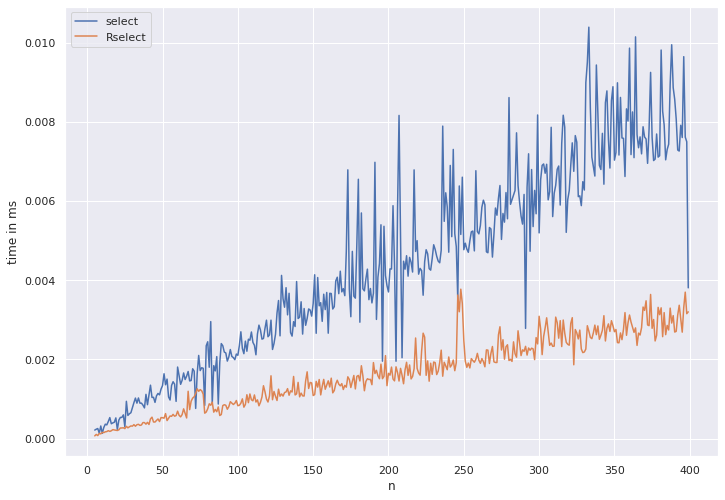

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from timeit import repeat

%matplotlib inline
sns.set(context='notebook', style='darkgrid', palette='dark')
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Tiempo

x=[]; x2=[]
y=[]; y2=[]

for n in range(5,400):

  a = random.sample(range(1, 1000), n)
  t = repeat(setup="from __main__ import select", stmt=f"select({a},{0},{len(a)-1}, {n//2})", repeat=1, number=10)

  x.append(n)
  y.append(t)

for n in range(5,400):

  a = random.sample(range(1, 1000), n)
  t = repeat(setup="from __main__ import Rselect", stmt=f"Rselect({a},{0},{len(a)-1}, {n//2})", repeat=1, number=10)

  x2.append(n)
  y2.append(t)
  
plt.plot(x,y)
plt.plot(x2,y2)
plt.legend(["select", "Rselect"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

Con tal de evitar el peor caso de `RandomSelect`, se realizan una serie de operaciones extra que no quedan expresadas en notación *($O(n)$)*. Ambos tienen un tiempo de ejecución lineal, pero `select` realiza más operaciones que `RandomSelect` en promedio, significando un mayor tiempo de ejecución. 

#### 4.2.2 ***Comparaciones***
A continuación se comparará la cantidad de comparaciones de entre `select` y `Rselect` para valores de  $n$  de  $5$  a  $700$ , para buscar el  $n/2−ésimo$ elemento *(mediana)*

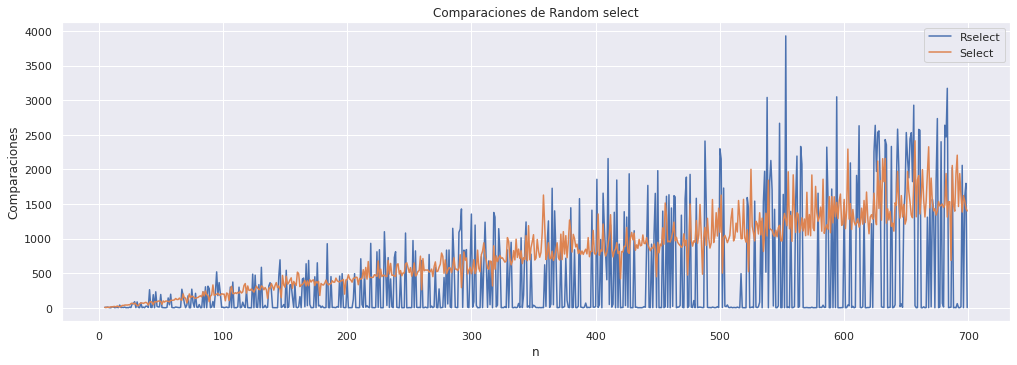

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns
import random

%matplotlib inline
sns.set(context='notebook', style='darkgrid', palette='dark')
sns.set(rc={'figure.figsize':(17,5.5)})

# Rselect
x=[n for n in range(5,700)] 
y=[]; y2 = []

for n in range(5,700):
  a = random.sample(range(1, 700), n)
  value, counter = Rselect(a,0,len(a)-1, n//2)
  y.append(counter)

for n in range(5,700):
  a = random.sample(range(1, 700), n)
  value, counter = select(a,0,len(a)-1, n//2)
  y2.append(counter)

plt.title("Comparaciones de Random select")
plt.plot(x,y)
plt.plot(x,y2)
plt.ylabel("Comparaciones")
plt.xlabel("n")

plt.legend(["Rselect", "Select"])

plt.show()

In [143]:
print(f"Total de comparaciones para RSelect {sum(y)}")
print(f"Total de comparaciones para Select {sum(y2)}")

Total de comparaciones para RSelect 277853
Total de comparaciones para Select 545207


Se observa que `RandomSelect` es mucho menos estable que `select` en cuanto a la cantidad de comparaciones totales que se realizan. Esto tiene sentido pues el método de partición para `select` asegura una buena partición y limita el tamaño máximo y mínimo del arreglo *$(7n/10)$* vs *$(3n/10)$*, respectivamente.

Mientras, al ser la partición aleatoria en `RandomSelect`, no hay límites.

Sin embargo, pareciera que no asegura una cantidad menor de comparaciones en total, como parece demostrar la suma de los ejes y.